In [16]:
## Import Dependencies

from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import datetime as dt
import time
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [17]:
#Read in the power data for DP&L
df = pd.read_csv('DPL_Hourly_Consumption.csv',parse_dates =['Datetime'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121275 entries, 0 to 121274
Data columns (total 2 columns):
Datetime     121275 non-null datetime64[ns]
DAYTON_MW    121275 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


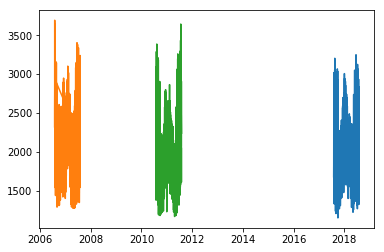

In [21]:
## some simple plots to visualize the data

x = df[(df.Datetime> "2017-08-01") & (df.Datetime <= '2018-08-01')].Datetime
y = df[(df.Datetime> "2017-08-01") & (df.Datetime <= '2018-08-01')].DAYTON_MW
x2 = df[(df.Datetime> "2006-08-01") & (df.Datetime <= '2007-08-01')].Datetime
y2 = df[(df.Datetime> "2006-08-01") & (df.Datetime <= '2007-08-01')].DAYTON_MW
x3 = df[(df.Datetime> "2010-08-01") & (df.Datetime <= '2011-08-01')].Datetime
y3 = df[(df.Datetime> "2010-08-01") & (df.Datetime <= '2011-08-01')].DAYTON_MW
plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x3,y3)

plt.show()



In [22]:
# Read in Weather Data

Wd = pd.read_json("weather_data_json_dayton_bulkText.json")

In [23]:
Wd.head()
Wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42169 entries, 0 to 42168
Data columns (total 9 columns):
city_id    42169 non-null int64
clouds     42169 non-null object
dt         42169 non-null int64
dt_iso     42169 non-null object
main       42169 non-null object
rain       6327 non-null object
snow       46 non-null object
weather    42169 non-null object
wind       42169 non-null object
dtypes: int64(2), object(7)
memory usage: 2.9+ MB


In [24]:
Wd['Date_Clean'] = (Wd['dt_iso'].apply(lambda x: x[:19])
                    .apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
                   )

In [8]:
Wd2 = Wd.assign(year = Wd['Date_Clean'].dt.year,
         month = Wd['Date_Clean'].dt.month,
         day = Wd['Date_Clean'].dt.day,
         day_of_week = Wd['Date_Clean'].dt.weekday,
         weekend = Wd['Date_Clean'].dt.weekday.apply(lambda x : 1 if x > 4 else 0)).copy()
Wd2.head()

city_id       clouds          dt                         dt_iso  \
0  4509884  {'all': 75}  1349096400  2012-10-01 13:00:00 +0000 UTC   
1  4509884  {'all': 75}  1349100000  2012-10-01 14:00:00 +0000 UTC   
2  4509884  {'all': 75}  1349190000  2012-10-02 15:00:00 +0000 UTC   
3  4509884   {'all': 1}  1349193600  2012-10-02 16:00:00 +0000 UTC   
4  4509884  {'all': 40}  1349197200  2012-10-02 17:00:00 +0000 UTC   

                                                main rain snow  \
0  {'temp': 284.02, 'temp_min': 282.15, 'temp_max...  NaN  NaN   
1  {'temp': 285.83, 'temp_min': 284.26, 'temp_max...  NaN  NaN   
2  {'temp': 287.44, 'temp_min': 286.48, 'temp_max...  NaN  NaN   
3  {'temp': 288.31, 'temp_min': 287.15, 'temp_max...  NaN  NaN   
4  {'temp': 289.5, 'temp_min': 288.71, 'temp_max'...  NaN  NaN   

                                             weather                     wind  \
0  [{'id': 803, 'main': 'Clouds', 'description': ...  {'speed': 2, 'deg': 30}   
1  [{'id': 803, 'main': 'Clouds', 'description': ...  {'speed': 2, 'deg': 50}   
2  [{'id': 803, 'main': 'Clouds', 'description': ...  {'speed': 3, 'deg': 90}   
3  [{'id': 800, 'main': 'Clear', 'description': '...  {'speed': 3, 'deg': 70}   
4  [{'id': 802, 'main': 'Clouds', 'description': ...  {'speed': 4, 'deg': 80}   

           Date_Clean  year  month  day  day_of_week  weekend  
0 2012-10-01 13:00:00  2012     10    1            0        0  
1 2012-10-01 14:00:00  2012     10    1            0        0  
2 2012-10-02 15:00:00  2012     10    2            1        0  
3 2012-10-02 16:00:00  2012     10    2            1        0  
4 2012-10-02 17:00:00  2012     10    2            1        0

In [25]:
# We have some conversions to do as some of the columns are dicts, and units are not suitable

Temp = []
Humidity = []
Wind = []
Date_Time = []
Rain = []
Month = []
Snow = []
Year = []
Day = []
Day_of_Week = []
Weekend = []

for i in range(0,len(Wd2)):
    #Convert to Fahrenheit
    t = round(((Wd2.main[i]['temp_max']-273.15)*9/5)+32,2)
    h = Wd2.main[i]['humidity']
    #Convert to MPH
    w = round(Wd2.wind[i]['speed']*2.26394,2)
    d = Wd2['Date_Clean'][i]
    r = Wd2.rain[i]
    s = Wd2.snow[i]
    m = Wd2.month[i]
    y = Wd2.year[i]
    dy = Wd2.day[i]
    dow =Wd2.day_of_week[i]
    wknd = Wd2.weekend[i]
    Rain.append(r)
    Snow.append(s)
    Date_Time.append(d)
    Wind.append(w)
    Humidity.append(h)
    Temp.append(t)
    Month.append(m)
    Year.append(y)
    Day.append(dy)
    Day_of_Week.append(dow)
    Weekend.append(wknd)

    
# now we have a group of lists 


In [26]:
#Next build dictionary to reassemble our DF
Wd_dict = {'City':"Dayton,OH",'Datetime':Date_Time,"Year":Year,'Month':Month,'Day':Day,'Day_of_Week':Day_of_Week,'Weekend':Weekend,'Temperature(F)':Temp,
          'Humidity':Humidity,'Wind Speed(mph)':Wind,'Rain Volume':Rain,'Snow Volume':Snow,}
Wd_df = pd.DataFrame(Wd_dict)

In [27]:
Wd_df.head()


City            Datetime  Year  Month  Day  Day_of_Week  Weekend  \
0  Dayton,OH 2012-10-01 13:00:00  2012     10    1            0        0   
1  Dayton,OH 2012-10-01 14:00:00  2012     10    1            0        0   
2  Dayton,OH 2012-10-02 15:00:00  2012     10    2            1        0   
3  Dayton,OH 2012-10-02 16:00:00  2012     10    2            1        0   
4  Dayton,OH 2012-10-02 17:00:00  2012     10    2            1        0   

   Temperature(F)  Humidity  Wind Speed(mph) Rain Volume Snow Volume  
0           54.00        81             4.53         NaN         NaN  
1           57.99        76             4.53         NaN         NaN  
2           59.00        62             6.79         NaN         NaN  
3           62.01        77             6.79         NaN         NaN  
4           63.00        72             9.06         NaN         NaN

In [29]:
Wd_df.loc[(Wd.df['Month'] ==12) & (Wd.df['Year'] == 2017)]

AttributeError: 'DataFrame' object has no attribute 'df'

In [30]:
## calling info we confirm we have a datetime object for Datetime
Wd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42169 entries, 0 to 42168
Data columns (total 12 columns):
City               42169 non-null object
Datetime           42169 non-null datetime64[ns]
Year               42169 non-null int64
Month              42169 non-null int64
Day                42169 non-null int64
Day_of_Week        42169 non-null int64
Weekend            42169 non-null int64
Temperature(F)     42169 non-null float64
Humidity           42169 non-null int64
Wind Speed(mph)    42169 non-null float64
Rain Volume        6327 non-null object
Snow Volume        46 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 3.9+ MB


In [31]:
## ok now ready we agreed to use more recent data for our dataset so will grab data from May1 of 2016 thru April 30 2018.
df.Datetime.head(24)

df_2 = df[(df.Datetime>='2016-05-01 00:00:00') & (df.Datetime< '2018-05-01 00:00:00')].copy()
df_2.set_index('Datetime',inplace = True)
df_2



DAYTON_MW
Datetime                      
2016-12-31 01:00:00       1788
2016-12-31 02:00:00       1730
2016-12-31 03:00:00       1701
2016-12-31 04:00:00       1693
2016-12-31 05:00:00       1708
2016-12-31 06:00:00       1732
2016-12-31 07:00:00       1778
2016-12-31 08:00:00       1849
2016-12-31 09:00:00       1877
2016-12-31 10:00:00       1937
2016-12-31 11:00:00       1949
2016-12-31 12:00:00       1918
2016-12-31 13:00:00       1913
2016-12-31 14:00:00       1913
2016-12-31 15:00:00       1905
2016-12-31 16:00:00       1901
2016-12-31 17:00:00       1927
2016-12-31 18:00:00       2015
2016-12-31 19:00:00       1999
2016-12-31 20:00:00       1929
2016-12-31 21:00:00       1854
2016-12-31 22:00:00       1805
2016-12-31 23:00:00       1745
2017-01-01 00:00:00       1695
2016-12-30 01:00:00       1801
2016-12-30 02:00:00       1754
2016-12-30 03:00:00       1733
2016-12-30 04:00:00       1727
2016-12-30 05:00:00       1758
2016-12-30 06:00:00       1838
...                        ...
2018-01-02 19:00:00       2971
2018-01-02 20:00:00       2971
2018-01-02 21:00:00       2932
2018-01-02 22:00:00       2865
2018-01-02 23:00:00       2771
2018-01-03 00:00:00       2674
2018-01-01 01:00:00       2306
2018-01-01 02:00:00       2286
2018-01-01 03:00:00       2266
2018-01-01 04:00:00       2256
2018-01-01 05:00:00       2248
2018-01-01 06:00:00       2288
2018-01-01 07:00:00       2337
2018-01-01 08:00:00       2400
2018-01-01 09:00:00       2427
2018-01-01 10:00:00       2452
2018-01-01 11:00:00       2481
2018-01-01 12:00:00       2480
2018-01-01 13:00:00       2454
2018-01-01 14:00:00       2419
2018-01-01 15:00:00       2372
2018-01-01 16:00:00       2384
2018-01-01 17:00:00       2441
2018-01-01 18:00:00       2617
2018-01-01 19:00:00       2714
2018-01-01 20:00:00       2732
2018-01-01 21:00:00       2724
2018-01-01 22:00:00       2664
2018-01-01 23:00:00       2614
2018-01-02 00:00:00       2552

[17520 rows x 1 columns]

In [32]:
## lets take a look at the len
len(df_2)


17520

In [33]:
## so the Weather Df we create should be of the same length

Wd_df_2 = Wd_df[(Wd_df.Datetime>='2016-05-01 00:00:00') & (Wd_df.Datetime< '2018-05-01 00:00:00')].copy()
Wd_df_2.set_index('Datetime',inplace = True)
Wd_df_2.head()

City  Year  Month  Day  Day_of_Week  Weekend  \
Datetime                                                                 
2016-05-01 00:00:00  Dayton,OH  2016      5    1            6        1   
2016-05-01 01:00:00  Dayton,OH  2016      5    1            6        1   
2016-05-01 02:00:00  Dayton,OH  2016      5    1            6        1   
2016-05-01 03:00:00  Dayton,OH  2016      5    1            6        1   
2016-05-01 04:00:00  Dayton,OH  2016      5    1            6        1   

                     Temperature(F)  Humidity  Wind Speed(mph)   Rain Volume  \
Datetime                                                                       
2016-05-01 00:00:00            59.0       100             4.53   {'1h': 1.1}   
2016-05-01 01:00:00            59.0       100             9.06  {'1h': 0.76}   
2016-05-01 02:00:00            59.0        87             9.06  {'1h': 0.51}   
2016-05-01 03:00:00            59.0        93             9.06  {'1h': 0.25}   
2016-05-01 04:00:00            60.8       100             4.53  {'1h': 0.25}   

                    Snow Volume  
Datetime                         
2016-05-01 00:00:00         NaN  
2016-05-01 01:00:00         NaN  
2016-05-01 02:00:00         NaN  
2016-05-01 03:00:00         NaN  
2016-05-01 04:00:00         NaN

In [34]:
### so it seems we have some missing values in the weather data this will mean some times 76 hours where we will not get a 
## match on the join.

combined_df = df_2.join(Wd_df_2,how = 'left')
combined_df.drop(index = combined_df[combined_df.City.isna()].index.values,inplace = True)


In [35]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17444 entries, 2016-05-01 00:00:00 to 2018-04-30 23:00:00
Data columns (total 12 columns):
DAYTON_MW          17444 non-null int64
City               17444 non-null object
Year               17444 non-null float64
Month              17444 non-null float64
Day                17444 non-null float64
Day_of_Week        17444 non-null float64
Weekend            17444 non-null float64
Temperature(F)     17444 non-null float64
Humidity           17444 non-null float64
Wind Speed(mph)    17444 non-null float64
Rain Volume        1102 non-null object
Snow Volume        0 non-null object
dtypes: float64(8), int64(1), object(3)
memory usage: 1.7+ MB


In [36]:
Christmas_df = combined_df[(combined_df.Month == 12) & (combined_df.Day_of_Week == 6) & (combined_df.Year == 2016.0)]
print (Christmas_df)

Christmas_df.head()


                     DAYTON_MW       City    Year  Month   Day  Day_of_Week  \
Datetime                                                                      
2016-12-04 00:00:00       1786  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 01:00:00       1720  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 02:00:00       1656  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 03:00:00       1614  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 04:00:00       1606  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 05:00:00       1617  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 07:00:00       1693  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 08:00:00       1784  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 09:00:00       1824  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 10:00:00       1886  Dayton,OH  2016.0   12.0   4.0          6.0   
2016-12-04 11:00:00       1896  Dayton,OH  2016.0   

DAYTON_MW       City    Year  Month  Day  Day_of_Week  \
Datetime                                                                     
2016-12-04 00:00:00       1786  Dayton,OH  2016.0   12.0  4.0          6.0   
2016-12-04 01:00:00       1720  Dayton,OH  2016.0   12.0  4.0          6.0   
2016-12-04 02:00:00       1656  Dayton,OH  2016.0   12.0  4.0          6.0   
2016-12-04 03:00:00       1614  Dayton,OH  2016.0   12.0  4.0          6.0   
2016-12-04 04:00:00       1606  Dayton,OH  2016.0   12.0  4.0          6.0   

                     Weekend  Temperature(F)  Humidity  Wind Speed(mph)  \
Datetime                                                                  
2016-12-04 00:00:00      1.0            41.0      60.0             2.26   
2016-12-04 01:00:00      1.0            39.2      69.0             2.26   
2016-12-04 02:00:00      1.0            39.2      83.0             2.26   
2016-12-04 03:00:00      1.0            37.4      74.0             2.26   
2016-12-04 04:00:00      1.0            37.4      80.0             2.26   

                    Rain Volume Snow Volume  
Datetime                                     
2016-12-04 00:00:00         NaN         NaN  
2016-12-04 01:00:00         NaN         NaN  
2016-12-04 02:00:00         NaN         NaN  
2016-12-04 03:00:00         NaN         NaN  
2016-12-04 04:00:00         NaN         NaN

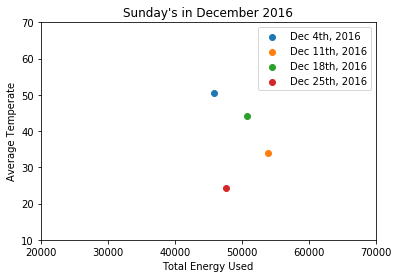

In [85]:
y1= Christmas_df[Christmas_df.Day == 4]['Temperature(F)'].mean()
x1= Christmas_df[Christmas_df.Day == 4]['DAYTON_MW'].sum()
y2= Christmas_df[Christmas_df.Day == 11]['Temperature(F)'].mean()
x2= Christmas_df[Christmas_df.Day == 11]['DAYTON_MW'].sum()
y3= Christmas_df[Christmas_df.Day == 18]['Temperature(F)'].mean()
x3= Christmas_df[Christmas_df.Day == 18]['DAYTON_MW'].sum()
y4= Christmas_df[Christmas_df.Day == 25]['Temperature(F)'].mean()
x4= Christmas_df[Christmas_df.Day == 25]['DAYTON_MW'].sum()

plt.scatter(x1,y1,label = "Dec 4th, 2016")
plt.scatter(x2,y2,label = "Dec 11th, 2016")
plt.scatter(x3,y3,label = "Dec 18th, 2016")
plt.scatter(x4,y4,label = "Dec 25th, 2016")

plt.ylabel("Average Temperate")
plt.xlabel("Total Energy Used")
plt.title("Sunday's in December 2016")

plt.xlim(xmin=20000, xmax=70000)
plt.ylim(ymin=10, ymax=70)
#ax.legend()
plt.legend(loc="best")

plt.show()



In [75]:
Christmas17_df = combined_df[(combined_df.Month == 12) & (combined_df.Day_of_Week == 0) & (combined_df.Year == 2017.0)]
print (Christmas_df)

Christmas17_df.head()

                     DAYTON_MW       City    Year  Month   Day  Day_of_Week  \
Datetime                                                                      
2017-12-04 00:00:00       1773  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 01:00:00       1726  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 02:00:00       1683  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 03:00:00       1676  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 04:00:00       1703  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 05:00:00       1734  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 06:00:00       1870  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 07:00:00       2089  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 09:00:00       2204  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 10:00:00       2200  Dayton,OH  2017.0   12.0   4.0          0.0   
2017-12-04 11:00:00       2171  Dayton,OH  2017.0   

DAYTON_MW       City    Year  Month  Day  Day_of_Week  \
Datetime                                                                     
2017-12-04 00:00:00       1773  Dayton,OH  2017.0   12.0  4.0          0.0   
2017-12-04 01:00:00       1726  Dayton,OH  2017.0   12.0  4.0          0.0   
2017-12-04 02:00:00       1683  Dayton,OH  2017.0   12.0  4.0          0.0   
2017-12-04 03:00:00       1676  Dayton,OH  2017.0   12.0  4.0          0.0   
2017-12-04 04:00:00       1703  Dayton,OH  2017.0   12.0  4.0          0.0   

                     Weekend  Temperature(F)  Humidity  Wind Speed(mph)  \
Datetime                                                                  
2017-12-04 00:00:00      0.0            48.2      80.0             4.53   
2017-12-04 01:00:00      0.0            44.6      86.0             4.53   
2017-12-04 02:00:00      0.0            44.6      86.0             6.79   
2017-12-04 03:00:00      0.0            44.6      93.0             6.79   
2017-12-04 04:00:00      0.0            44.6      70.0             6.79   

                    Rain Volume Snow Volume  
Datetime                                     
2017-12-04 00:00:00         NaN         NaN  
2017-12-04 01:00:00         NaN         NaN  
2017-12-04 02:00:00         NaN         NaN  
2017-12-04 03:00:00         NaN         NaN  
2017-12-04 04:00:00         NaN         NaN

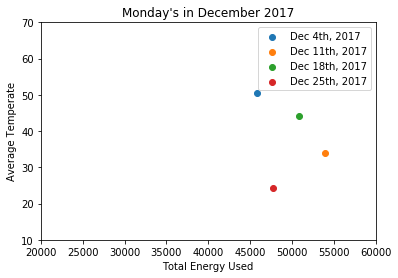

In [84]:
y1= Christmas17_df[Christmas17_df.Day == 4]['Temperature(F)'].mean()
x1= Christmas17_df[Christmas17_df.Day == 4]['DAYTON_MW'].sum()
y2= Christmas17_df[Christmas17_df.Day == 11]['Temperature(F)'].mean()
x2= Christmas17_df[Christmas17_df.Day == 11]['DAYTON_MW'].sum()
y3= Christmas17_df[Christmas17_df.Day == 18]['Temperature(F)'].mean()
x3= Christmas17_df[Christmas17_df.Day == 18]['DAYTON_MW'].sum()
y4= Christmas17_df[Christmas17_df.Day == 25]['Temperature(F)'].mean()
x4= Christmas17_df[Christmas17_df.Day == 25]['DAYTON_MW'].sum()

plt.scatter(x1,y1,label = "Dec 4th, 2017")
plt.scatter(x2,y2,label = "Dec 11th, 2017")
plt.scatter(x3,y3,label = "Dec 18th, 2017")
plt.scatter(x4,y4,label = "Dec 25th, 2017")

plt.ylabel("Average Temperate")
plt.xlabel("Total Energy Used")
plt.title("Monday's in December 2017")

plt.xlim(xmin=20000, xmax=60000)
plt.ylim(ymin=10, ymax=70)
#ax.legend()
plt.legend(loc="best")

plt.show()

In [97]:
July417_df = combined_df[(combined_df.Month == 7) & (combined_df.Day_of_Week == 1) & (combined_df.Year == 2017.0)]
print (July417_df)

July417_df.head()

                     DAYTON_MW       City    Year  Month   Day  Day_of_Week  \
Datetime                                                                      
2017-07-04 00:00:00       1949  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 01:00:00       1790  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 02:00:00       1652  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 03:00:00       1559  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 04:00:00       1496  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 05:00:00       1464  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 06:00:00       1459  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 07:00:00       1438  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 08:00:00       1508  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 09:00:00       1662  Dayton,OH  2017.0    7.0   4.0          1.0   
2017-07-04 10:00:00       1854  Dayton,OH  2017.0   

DAYTON_MW       City    Year  Month  Day  Day_of_Week  \
Datetime                                                                     
2017-07-04 00:00:00       1949  Dayton,OH  2017.0    7.0  4.0          1.0   
2017-07-04 01:00:00       1790  Dayton,OH  2017.0    7.0  4.0          1.0   
2017-07-04 02:00:00       1652  Dayton,OH  2017.0    7.0  4.0          1.0   
2017-07-04 03:00:00       1559  Dayton,OH  2017.0    7.0  4.0          1.0   
2017-07-04 04:00:00       1496  Dayton,OH  2017.0    7.0  4.0          1.0   

                     Weekend  Temperature(F)  Humidity  Wind Speed(mph)  \
Datetime                                                                  
2017-07-04 00:00:00      0.0            84.2      54.0             6.79   
2017-07-04 01:00:00      0.0            80.6      61.0             6.79   
2017-07-04 02:00:00      0.0            80.6      73.0             9.06   
2017-07-04 03:00:00      0.0            77.0      65.0             6.79   
2017-07-04 04:00:00      0.0            75.2      69.0             4.53   

                    Rain Volume Snow Volume  
Datetime                                     
2017-07-04 00:00:00         NaN         NaN  
2017-07-04 01:00:00         NaN         NaN  
2017-07-04 02:00:00         NaN         NaN  
2017-07-04 03:00:00         NaN         NaN  
2017-07-04 04:00:00         NaN         NaN

In [99]:
y1= July417_df[July417_df.Day == 4]['Temperature(F)'].mean()
x1= July417_df[July417_df.Day == 4]['DAYTON_MW'].sum()

print(y1)

77.37500000000001


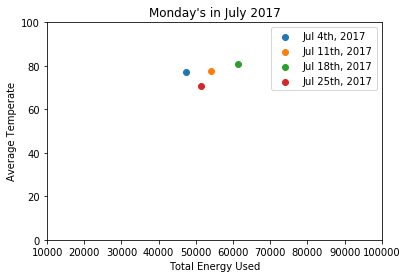

In [102]:
y1= July417_df[July417_df.Day == 4]['Temperature(F)'].mean()
x1= July417_df[July417_df.Day == 4]['DAYTON_MW'].sum()
y2= July417_df[July417_df.Day == 11]['Temperature(F)'].mean()
x2= July417_df[July417_df.Day == 11]['DAYTON_MW'].sum()
y3= July417_df[July417_df.Day == 18]['Temperature(F)'].mean()
x3= July417_df[July417_df.Day == 18]['DAYTON_MW'].sum()
y4= July417_df[July417_df.Day == 25]['Temperature(F)'].mean()
x4= July417_df[July417_df.Day == 25]['DAYTON_MW'].sum()

plt.scatter(x1,y1,label = "Jul 4th, 2017")
plt.scatter(x2,y2,label = "Jul 11th, 2017")
plt.scatter(x3,y3,label = "Jul 18th, 2017")
plt.scatter(x4,y4,label = "Jul 25th, 2017")

plt.ylabel("Average Temperate")
plt.xlabel("Total Energy Used")
plt.title("Monday's in July 2017")

plt.xlim(xmin=10000, xmax=100000)
plt.ylim(ymin=0, ymax=100)
#ax.legend()
plt.legend(loc="best")

plt.show()

In [104]:
July416_df = combined_df[(combined_df.Month == 7) & (combined_df.Day_of_Week == 0) & (combined_df.Year == 2016.0)]
print (July417_df)

July416_df.head()

                     DAYTON_MW       City    Year  Month   Day  Day_of_Week  \
Datetime                                                                      
2016-07-04 00:00:00       1415  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 01:00:00       1331  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 02:00:00       1278  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 03:00:00       1239  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 04:00:00       1220  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 05:00:00       1233  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 06:00:00       1252  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 07:00:00       1265  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 08:00:00       1285  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 09:00:00       1360  Dayton,OH  2016.0    7.0   4.0          0.0   
2016-07-04 10:00:00       1456  Dayton,OH  2016.0   

DAYTON_MW       City    Year  Month  Day  Day_of_Week  \
Datetime                                                                     
2016-07-04 00:00:00       1415  Dayton,OH  2016.0    7.0  4.0          0.0   
2016-07-04 01:00:00       1331  Dayton,OH  2016.0    7.0  4.0          0.0   
2016-07-04 02:00:00       1278  Dayton,OH  2016.0    7.0  4.0          0.0   
2016-07-04 03:00:00       1239  Dayton,OH  2016.0    7.0  4.0          0.0   
2016-07-04 04:00:00       1220  Dayton,OH  2016.0    7.0  4.0          0.0   

                     Weekend  Temperature(F)  Humidity  Wind Speed(mph)  \
Datetime                                                                  
2016-07-04 00:00:00      0.0            64.4      88.0             2.26   
2016-07-04 01:00:00      0.0            64.4      93.0             2.26   
2016-07-04 02:00:00      0.0            64.4     100.0             4.53   
2016-07-04 03:00:00      0.0            64.4     100.0             6.79   
2016-07-04 04:00:00      0.0            63.0     100.0             4.53   

                      Rain Volume Snow Volume  
Datetime                                       
2016-07-04 00:00:00           NaN         NaN  
2016-07-04 01:00:00  {'1h': 0.25}         NaN  
2016-07-04 02:00:00  {'1h': 1.44}         NaN  
2016-07-04 03:00:00  {'1h': 1.52}         NaN  
2016-07-04 04:00:00           NaN         NaN

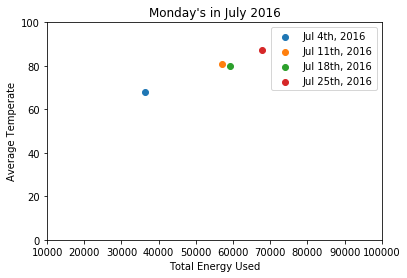

In [105]:
y1= July416_df[July416_df.Day == 4]['Temperature(F)'].mean()
x1= July416_df[July416_df.Day == 4]['DAYTON_MW'].sum()
y2= July416_df[July416_df.Day == 11]['Temperature(F)'].mean()
x2= July416_df[July416_df.Day == 11]['DAYTON_MW'].sum()
y3= July416_df[July416_df.Day == 18]['Temperature(F)'].mean()
x3= July416_df[July416_df.Day == 18]['DAYTON_MW'].sum()
y4= July416_df[July416_df.Day == 25]['Temperature(F)'].mean()
x4= July416_df[July416_df.Day == 25]['DAYTON_MW'].sum()

plt.scatter(x1,y1,label = "Jul 4th, 2016")
plt.scatter(x2,y2,label = "Jul 11th, 2016")
plt.scatter(x3,y3,label = "Jul 18th, 2016")
plt.scatter(x4,y4,label = "Jul 25th, 2016")

plt.ylabel("Average Temperate")
plt.xlabel("Total Energy Used")
plt.title("Monday's in July 2016")

plt.xlim(xmin=10000, xmax=100000)
plt.ylim(ymin=0, ymax=100)
#ax.legend()
plt.legend(loc="best")

plt.show()